<a href="https://colab.research.google.com/github/viiihbastos/googlecolabnotebooks/blob/main/Previs%C3%A3o_do_pre%C3%A7o_das_a%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from fbprophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #criando nova coluna chamada label com as últimas 5 linhas são nan
    X = np.array(df[[forecast_col]]) #criando a matriz de recursos
    X = preprocessing.scale(X) #processando a matriz de recursos
    X_lately = X[-forecast_out:] #criando a coluna que quero usar mais tarde no método de previsão
    X = X[:-forecast_out]  # X que conterá o treinamento e teste
    label.dropna(inplace=True) #descartando valores
    y = np.array(label)  # atribuindo Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0)  #validação cruzada

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [ ]:
df = pd.read_csv("/BTC-USD.csv")
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

             ds             y
0    2021-06-22  32505.660156
1    2021-06-23  33723.027344
2    2021-06-24  34662.437500
3    2021-06-25  31637.779297
4    2021-06-26  32186.277344
..          ...           ...
361  2022-06-18  19017.642578
362  2022-06-19  20553.271484
363  2022-06-20  20599.537109
364  2022-06-21  20710.597656
365  2022-06-22  20308.458984

[366 rows x 2 columns]


In [ ]:
prophet = Prophet()
prophet.fit(df)
future = prophet.make_future_dataframe(periods=365)
print(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds
0   2021-06-22
1   2021-06-23
2   2021-06-24
3   2021-06-25
4   2021-06-26
..         ...
726 2023-06-18
727 2023-06-19
728 2023-06-20
729 2023-06-21
730 2023-06-22

[731 rows x 1 columns]


In [ ]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2022-12-05,-14520.217574,-37552.611947,8388.685213
532,2022-12-06,-14791.505351,-38444.227440,8992.635631
533,2022-12-07,-14852.532882,-37811.239509,9089.385592
534,2022-12-08,-15423.683718,-38931.967269,7925.866947
535,2022-12-09,-15669.685396,-39270.046072,7155.130090
...,...,...,...,...
726,2023-06-18,-59579.482633,-134801.436854,18343.681496
727,2023-06-19,-59878.828187,-136799.798707,17403.492242
728,2023-06-20,-60150.115963,-138643.699662,16841.050771
729,2023-06-21,-60211.143494,-137002.333715,18244.173504


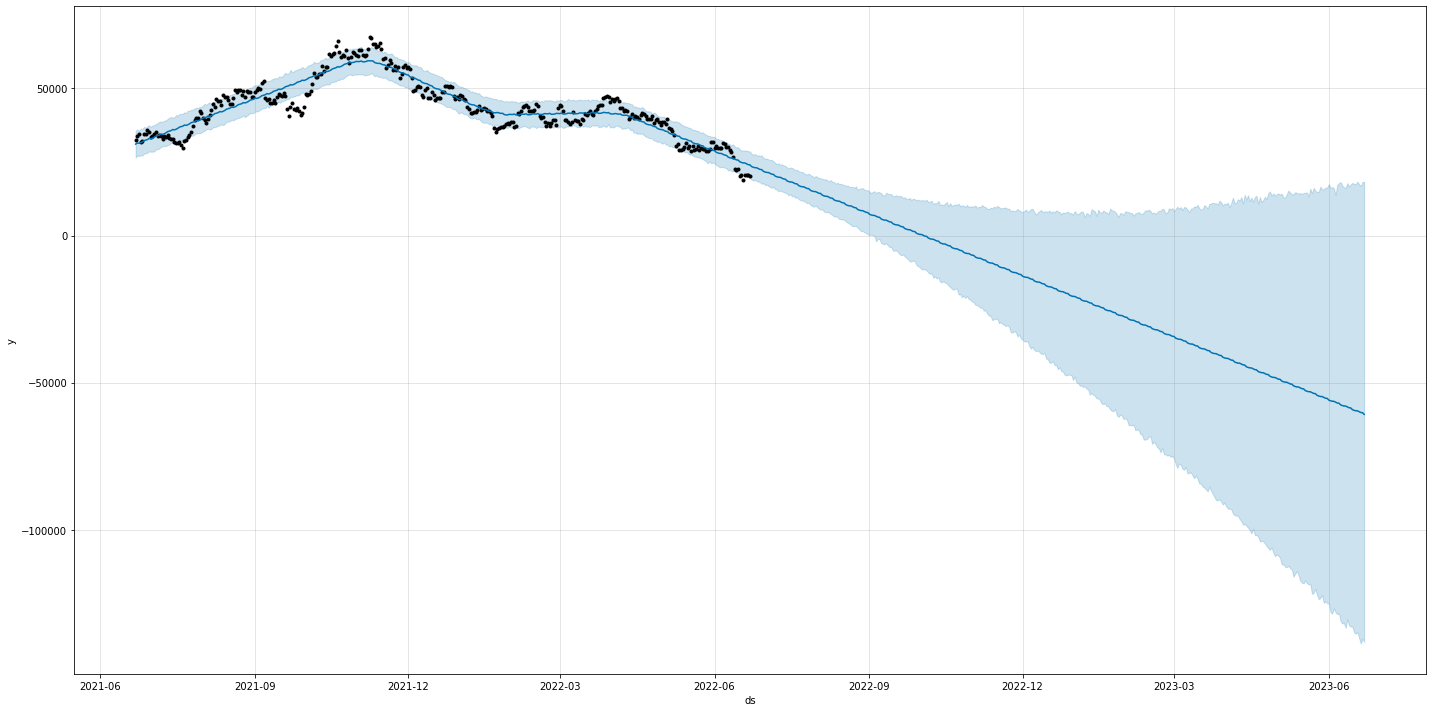

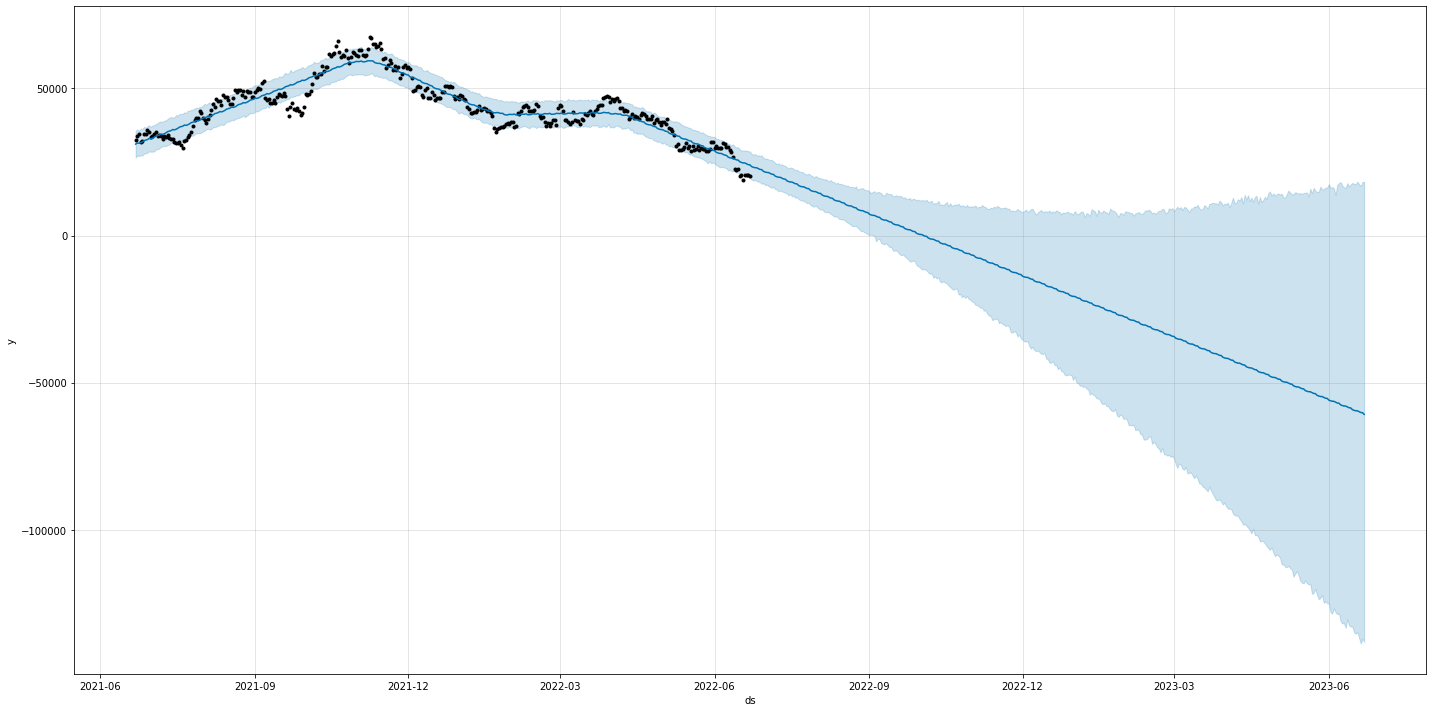

In [ ]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))